# CT Voter registration trends

Per request of colleague I looked at monthly voter registration trends by part, to test whether there really has been a big wave of Democratic excitement.

Here are some of the take-aways (please read them all or not at all):

1. __Independent streak__ - Unaffiliated has started beating both major parties (republican + democrat) combined more consistently since 2016. Over the entire 126 months (excluding July because it's partial), Unaffiliated beat majors 43 times, or 34%. But in the last 24 months, July 2016 to June 2018, there were 19 U-win months, which is 79%.
2. __Democrats have widened lead over Republicans__ - Democrats have always added more voters to their rolls on a monthly basis, but that's expected because their party is twice the size of the Republicans. However, even as a percentage of their party's size (based on June 2018 active voters), Ds have more steadily outpaced Rs than in the past. Unaffiliateds have also more steadily outpaced both, as noted above. 
3. __A higher floor__ - After presidential year spikes, there's usually a slump in registrations, and that was true after 2016 as well. However, the bottom is significantly higher. This could be related to programs that make it easier to for people to register, including motor voter registration at the DMV and online registration. Without the numbres for each program we can't determine this.
4. __But hold on...__ - Item 2, about the Democrats, while they have widened their lead over Republicans, overall registration is up across the board, so it's possible that this overall increase is just naturally making the gaps that have always been there even bigger. In absolute numbers, Democrats have always added more voters to the rolls on a monthly basis than Republicans.


### Data import and cleanup stuff: Non-nerds can skip this

In [349]:
import pandas as pd

In [350]:
""" The data came in two spreadsheets. Let's combine them. """

df = pd.concat([pd.read_excel("data/REGISTRATION BY YEAR MONTH PARTY.XLSX", header=None),
                pd.read_excel("data/2018 registrations.xlsx", header=None)])
df.columns = ["year","month","party","registrations"]

In [473]:
""" Don't need all these """

df["party"].unique()

array(['Other', u'Democratic', u'Green Party', u'Independent',
       u'Libertarian', u'Republican', u'Unaffiliated', u'Working Families',
       u'Bottom Line', u'U-It', u'A Sentinel Party', u'Reform',
       u'Unaffiliated (Conservative)', u'We The People', u'Independence',
       u'Friends Of Saybrook', u'A Brookfield Party',
       u'Milford Independent Party', u'Colchester Independent Party',
       u'U/i', u'Chatham Party', u'Independent Choice',
       u'Canterbury First', u'Realistic Balance', u'Spring Glen Party',
       u'Winsted Independent', u'A Better Future', u'Open'], dtype=object)

In [474]:
""" Parties of interest  """

parties = ["Democratic","Republican","Unaffiliated"]

In [ ]:
# df.head(20)

In [475]:
def group_others(df):
    
    """ Group all non-major parties together """
    ret = df.copy()
    
    
    ret = ret[ret["party"].apply(lambda x: x not in parties)]
    
    the_rest = ret.copy()

    ret = ret.groupby(["year","month"]).agg({"registrations":sum}).reset_index()
    ret["party"] = "Other"
    
    return pd.concat([ret, df.copy()])[["year","month","party","registrations"]]

df = group_others(df)

In [476]:
# df.head()

In [477]:
# df["year"].unique()

In [478]:
""" Add the Other category """
parties += ["Other"]
parties

['Democratic', 'Republican', 'Unaffiliated', 'Other']

In [479]:
# df.head()

In [480]:
# "Republican" in df["party"].unique()

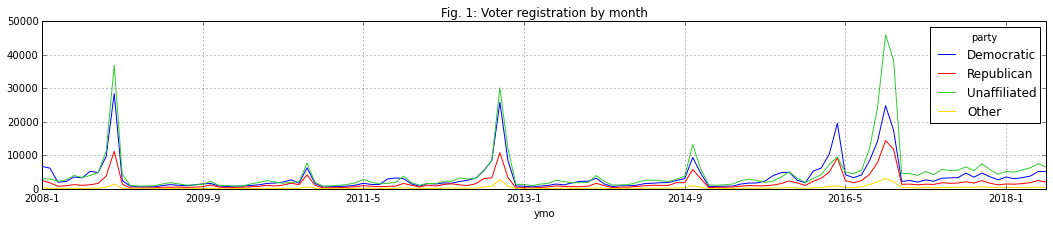

In [493]:
%matplotlib inline 
#timedf = pd.pivot_table(df, index="party",columns=["year","month"],values="registrations").reset_index()
# .transpose()
timedf = pd.pivot_table(df, index="party",columns=["year","month"],values="registrations")
#timedf

chartdf = timedf[timedf.index.map(lambda x: x in parties)]\
.transpose().reset_index()

chartdf

chartdf["ymo"] = chartdf["year"].astype(str) + "-" + chartdf["month"].astype(str)

""" Drop partial data from July 2018 """

chartdf = chartdf[chartdf["ymo"] != "2018-7"]

chartdf = chartdf.set_index("ymo")

chartdf = chartdf[parties]#[["Republican","Democratic","Unaffiliated"]]

colors = ["blue","red","limegreen","gold"]
chartdf\
.plot(
    figsize=(18,3),
    grid=True,
    colors=colors,
    title="Fig. 1: Voter registration by month"
    #ylim=(0,10000)
)


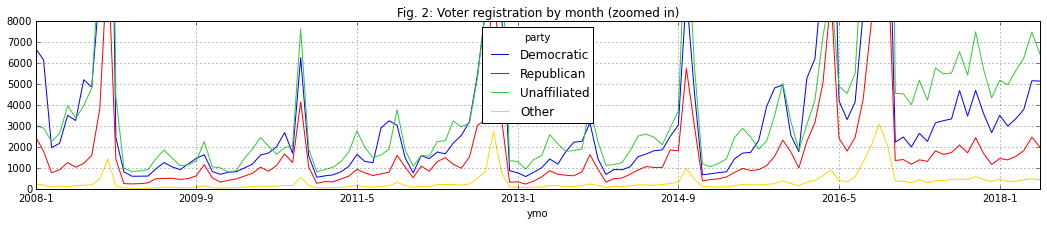

In [494]:
""" Let's zoom in """
chartdf\
.plot(
    figsize=(18,3),
    grid=True,
    colors=colors,
    ylim=(0,8000),
    title="Fig. 2: Voter registration by month (zoomed in)"
    
)


In [482]:
chartdf.tail()

party,Democratic,Republican,Unaffiliated,Other
ymo,,,,
2018-2,3000.0,1380.0,4976.0,358.5
2018-3,3346.0,1549.0,5647.0,360.0
2018-4,3795.0,1830.0,6253.0,433.5
2018-5,5163.0,2471.0,7492.0,478.5
2018-6,5149.0,1989.0,6446.0,429.0


In [483]:
""" Let's see how these figures look as a percentage of the most recent party size figures.
See other notebook for these figures. 
""" 
# 2010 	419353 	751360 	843399
# 2014 	407519 	712925 	818381
# 2018 YTD 	446265 	760672 	857111

size = {
    
    # Using 2014 proportions doesn't change the % much
    "Republican":"407519",
    "Democratic":"712925",
    "Unaffiliated":818381,
#     # 2018 numbers
#     "Republican":"446265",
#     "Democratic":"760672",
#     "Unaffiliated":"857111"
    
}

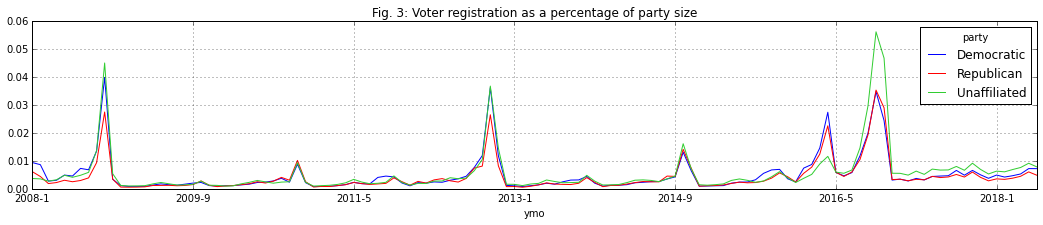

In [496]:
pctdf = chartdf.copy()[parties[:-1]]
for c in pctdf.columns:
    pctdf[c] = pctdf[c] / int(size[c])
pctdf.plot(grid=True,colors=colors, figsize=(18,3),
          title="Fig. 3: Voter registration as a percentage of party size")

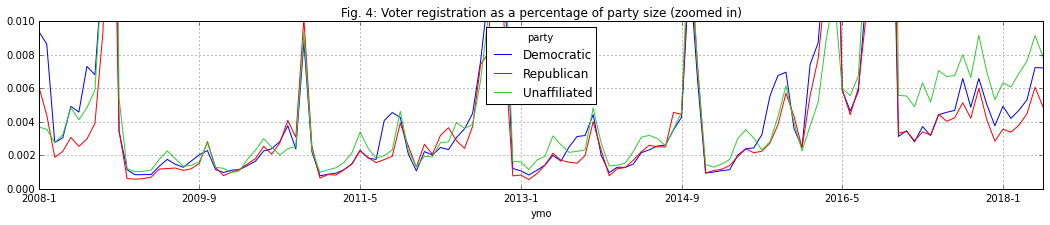

In [497]:
""" Let's zoom in """
pctdf.plot(grid=True,
           colors=colors,
           ylim=(0,.01),
           figsize=(18,3),
          title="Fig. 4: Voter registration as a percentage of party size (zoomed in)")

In [498]:
""" Print a spreadsheet for web chart tool """
#print (chartdf[parties[:-1]].to_csv(sep="\t",float_format="%.0f"))

' Print a spreadsheet for web chart tool '

In [499]:
""" Generate spreadsheet for Ana """
chartdf[parties[:-1]].to_excel("combined.xlsx")

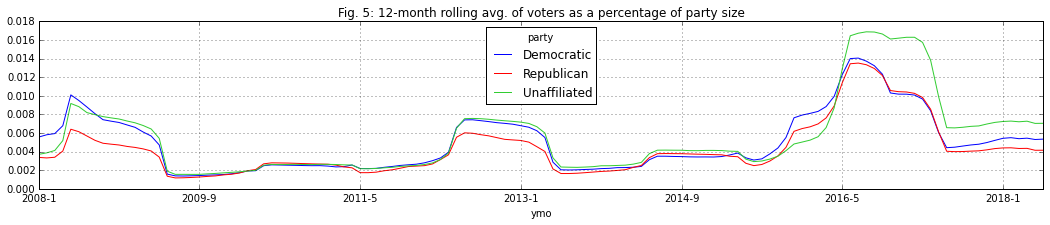

In [500]:
pctdf[parties[:-1]].rolling(12,center=True, min_periods=1)\
.mean().plot(figsize=(18,3), grid=True,
             colors=colors,
             title="Fig. 5: 12-month rolling avg. of voters as a percentage of party size")

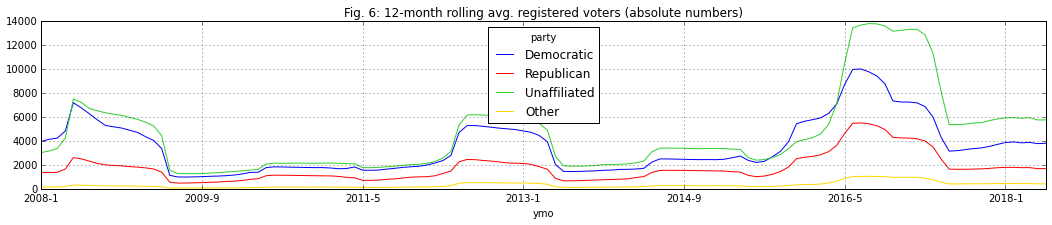

In [503]:
chartdf.rolling(12,center=True, min_periods=1).mean().plot(figsize=(18,3), grid=True,
                                                           colors=colors,
                                                          title="Fig. 6: 12-month rolling avg. registered voters (absolute numbers)")

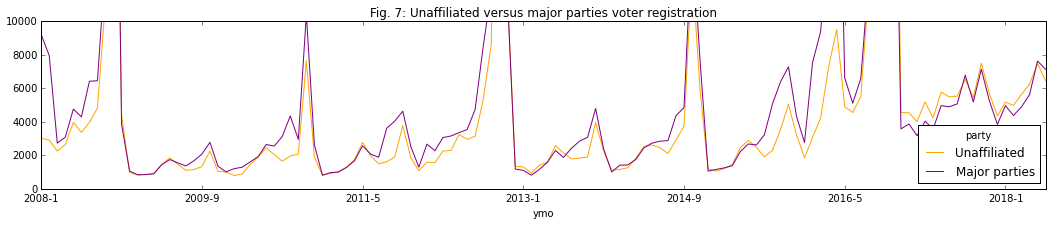

In [505]:
combined_df = chartdf.copy()
combined_df["Major parties"] = combined_df["Republican"] + combined_df["Democratic"]
combined_df[["Unaffiliated","Major parties"]].plot(ylim=(0,10000), figsize=(18,3), 
                                                   title="Fig. 7: Unaffiliated versus major parties voter registration",
                                                   colors=["orange","purple"])

In [460]:
combined_df.reset_index()[combined_df.reset_index()["ymo"] == "2016-11"]

party,ymo,Democratic,Republican,Unaffiliated,Other,Major parties
106,2016-11,17432.0,11824.0,38331.0,1413.0,29256.0


In [461]:
combined_df.reset_index()[combined_df.reset_index()["ymo"] == "2017-11"]

party,ymo,Democratic,Republican,Unaffiliated,Other,Major parties
118,2017-11,3584.0,1678.0,5697.0,300.0,5262.0


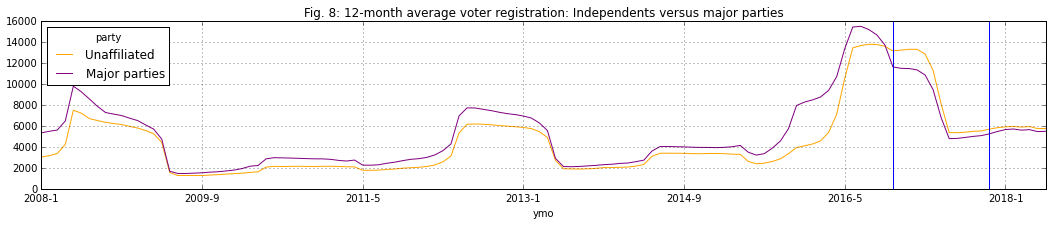

In [506]:
import matplotlib.pyplot as plt
ax = combined_df[["Unaffiliated","Major parties"]]\
.rolling(12,center=True, min_periods=1).mean().plot(
    figsize=(18,3), 
    grid=True, 
    colors=["orange","purple"],
    title="Fig. 8: 12-month average voter registration: Independents versus major parties"
)
ax.axvline(x=106, ymin=0, ymax=1600)
ax.axvline(x=106 + 12, ymin=0, ymax=1600)

### How often to unaffiliated voters win?

How many months do more unaffiliated voters register than democrats and Republicans combined (u-win months)?

Out of 126 months, 43 months have been u-wins (34%).

Out of the past 18 months, 15 have been u-wins (83%).

For the last 24omonths, U-wins were (79.2%).

Calculations are below.

In [507]:
diff_df["drdiff"] = diff_df["Democratic"] - diff_df["Republican"]

In [508]:
diff_df = combined_df.copy()
diff_df["diff"] = combined_df["Unaffiliated"] - combined_df["Major parties"]
print ( len(diff_df ))
print (len (diff_df[diff_df["diff"] > 0]))
print (len (diff_df[(diff_df["diff"] > 0)]))

print (len (diff_df[diff_df["diff"] < 0]))

126
43
43
82


In [509]:
print "u-wins % over entire data set"
43. / 126.

u-wins % over entire data set


0.3412698412698413

In [510]:
unaff_wins = diff_df[(diff_df["diff"] > 0.0)]

print "u-wins since 2017 on"
len(unaff_wins[unaff_wins.index.map(lambda x: x > "2017-0")])

u-wins since 2017 on


15

In [511]:
15. / 18.

0.8333333333333334

In [512]:
print "u-wins since Sept 2016 on"
len(unaff_wins[unaff_wins.index.map(lambda x: x > "2016-08")])

u-wins since Sept 2016 on


19

In [513]:
print "u-wins in past 24 months"
len(unaff_wins[unaff_wins.index.map(lambda x: x > "2016-06")])

u-wins in past 24 months


19

In [514]:
19. / 24.

0.7916666666666666